<a href="https://colab.research.google.com/github/5Spaak/Visualization-with-Matplotlib-and-Seaborn/blob/main/Comment_construire_un_mod%C3%A8le_de_Machine_Learning_avec_Python_et_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMMENT CONSTRUIRE, EVALUER ET SELECTIONNER EFFICACEMENT UN MODELE DE MACHINE LEANING




*   Analyse exploratoire des données;
*   Gestion des valeurs manquantes;
*   Gestions des valeurs aberrantes (outliers)
*   Autres étapes possibles de prétraitements des données
* Division de l'ensemble des données (données d'entrainement,de validation et de test)
* Construction de plusieurs modèles à partir de differentes algorithmes de marchine learning ;
* Comparaison des performances des algorithmes ;
* Selection et l'evaluation du modèle final.



# **Importation des librairies et des données**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df = df.drop(['alive','who','class', 'embarked','deck'], axis=1)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 57.6+ KB


## **Visualisation des données**

<Axes: xlabel='survived', ylabel='count'>

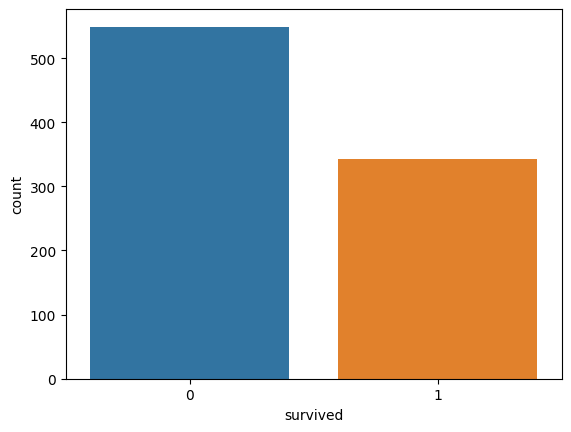

In [ ]:
sns.countplot(x='survived', data = df)

In [ ]:
df.survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

<Axes: xlabel='pclass', ylabel='count'>

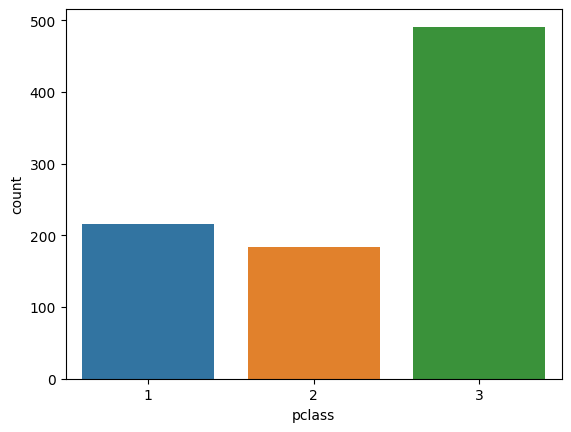

In [ ]:
sns.countplot(x='pclass', data=df)

<Axes: xlabel='sex', ylabel='count'>

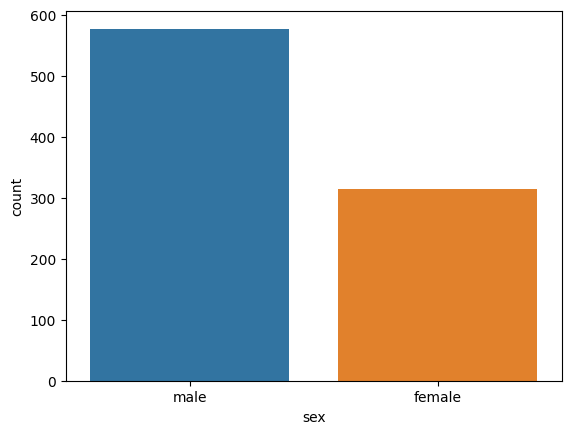

In [ ]:
sns.countplot(x='sex', data=df)

<Axes: xlabel='sibsp', ylabel='count'>

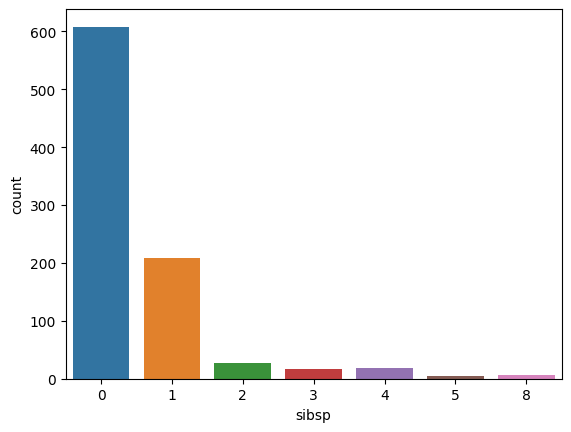

In [ ]:
sns.countplot(x='sibsp', data=df)

<Axes: xlabel='parch', ylabel='count'>

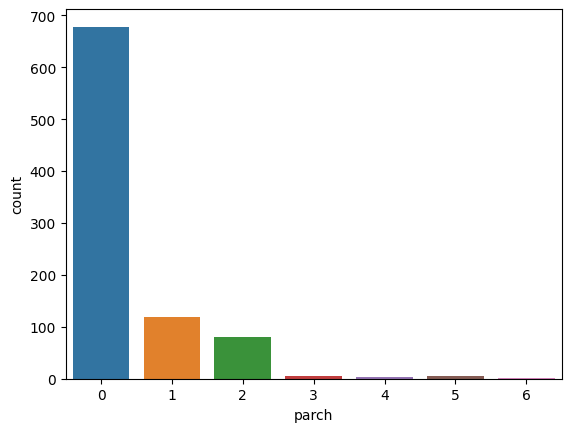

In [ ]:
sns.countplot(x='parch', data=df)

<Axes: xlabel='fare'>

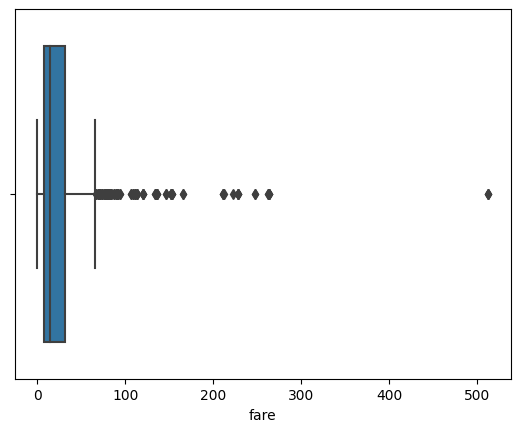

In [ ]:
sns.boxplot(x='fare', data=df)

<Axes: xlabel='adult_male', ylabel='count'>

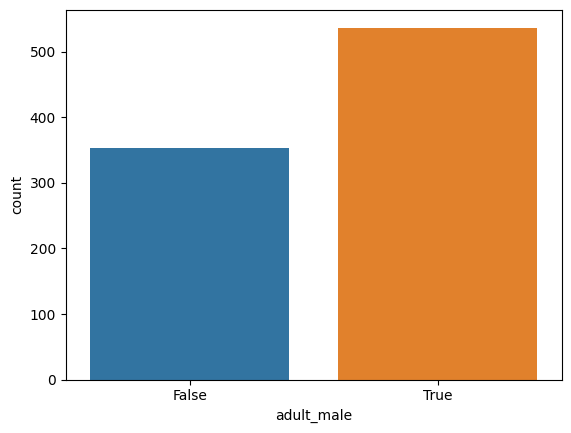

In [ ]:
sns.countplot(x='adult_male', data=df)

In [ ]:
pd.crosstab(df.sex, df.adult_male)

adult_male,False,True
sex,,
female,314,0
male,40,537


<Axes: xlabel='embark_town', ylabel='count'>

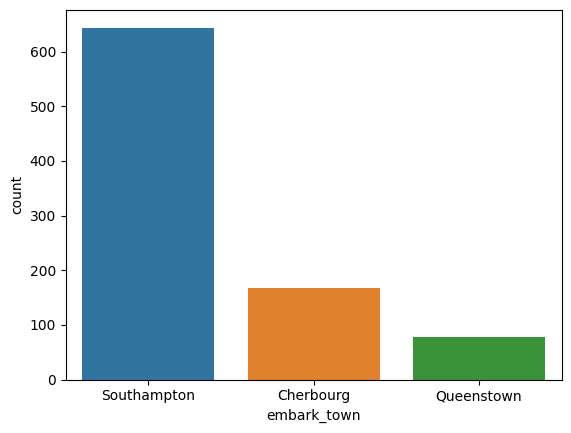

In [ ]:
sns.countplot(x='embark_town', data=df)

<Axes: xlabel='alone', ylabel='count'>

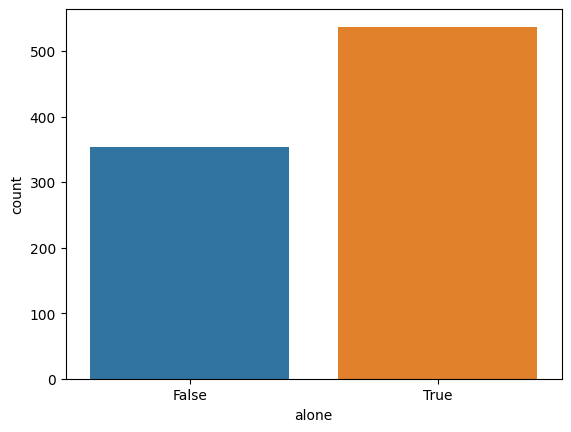

In [ ]:
sns.countplot(x='alone', data=df)

<Axes: xlabel='fare', ylabel='Count'>

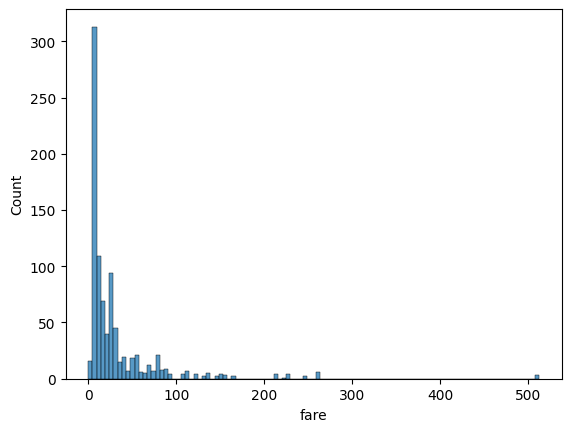

In [ ]:
sns.histplot(df['fare'], kde=False)

<Axes: ylabel='age'>

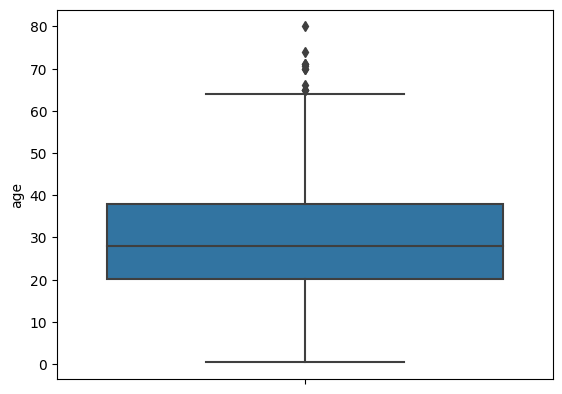

In [ ]:
sns.boxplot(y='age', data=df)

<Axes: xlabel='age', ylabel='Count'>

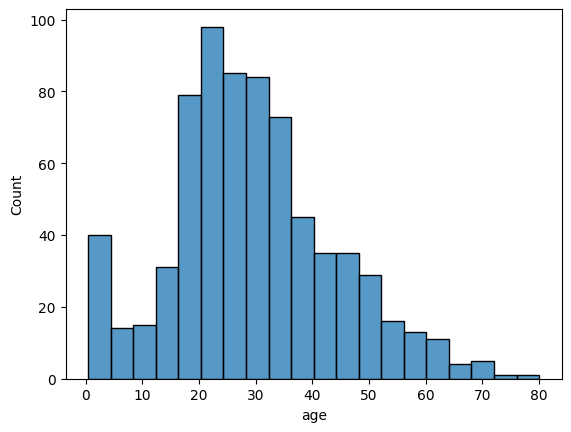

In [ ]:
sns.histplot(df['age'], kde=False, bins=20)

<Axes: xlabel='age', ylabel='Count'>

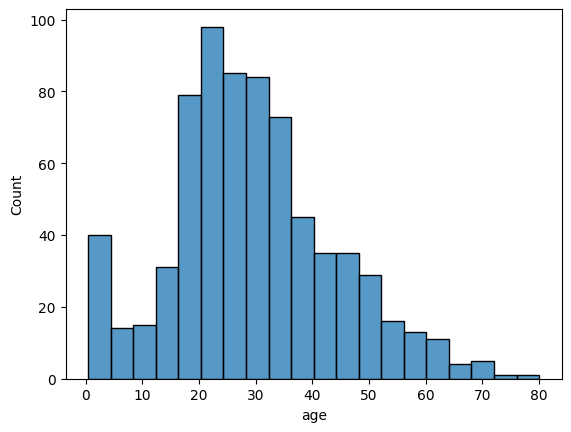

In [ ]:
sns.histplot(x = 'age', data=df, kde=False)

<Axes: xlabel='survived', ylabel='age'>

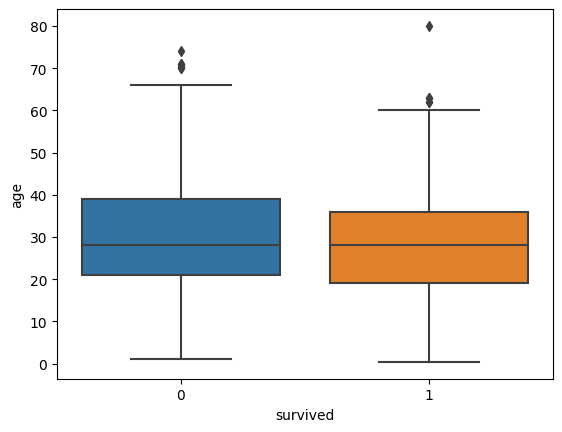

In [ ]:
# Relation between age variable and target variable

sns.boxplot(x='survived', y='age', data=df)

<Axes: xlabel='survived', ylabel='age'>

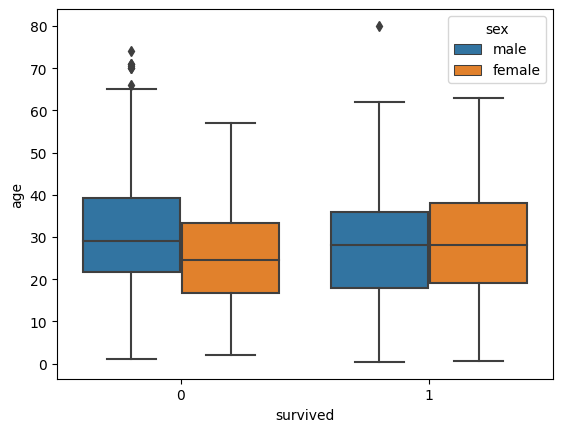

In [ ]:
sns.boxplot(x='survived', y='age', hue='sex',data=df)

<Axes: xlabel='survived', ylabel='fare'>

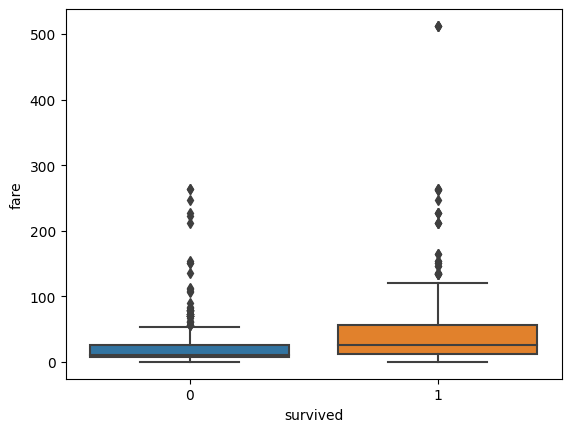

In [ ]:
sns.boxplot(x='survived', y='fare', data=df)

<Axes: xlabel='survived', ylabel='fare'>

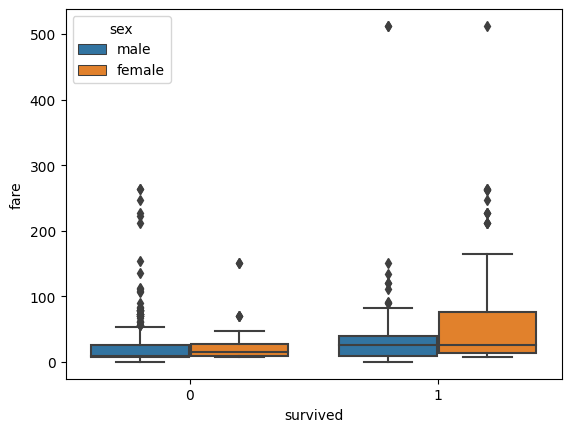

In [ ]:
sns.boxplot(x='survived', y='fare', hue='sex', data=df)

<Axes: xlabel='survived', ylabel='fare'>

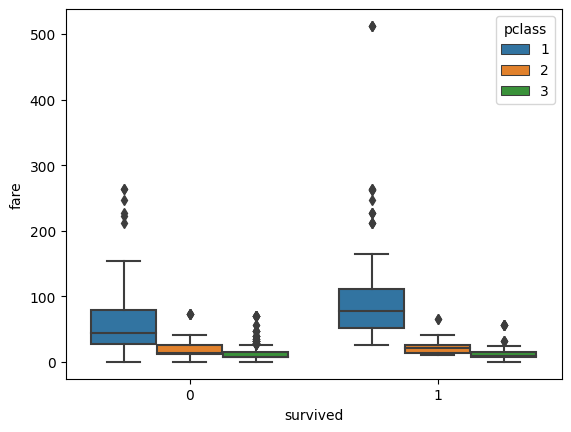

In [ ]:
sns.boxplot(x='survived', y='fare',hue='pclass', data=df)

## **Nettoyage des données**